In [1]:
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

rng = np.random.RandomState(8)

In [2]:
#Load data
music_file_path = 'features.csv'
original = np.array(pd.read_csv(music_file_path, index_col=0, header=[0, 1, 2]))
n_samples = int(original.shape[0]/5)
n_indices = rng.choice(np.arange(original.shape[0]), n_samples, replace=False)
original = original[n_indices, :]
original = StandardScaler().fit_transform(original).T
N = original.shape[1]
d = original.shape[0]

N =  21314
d =  518


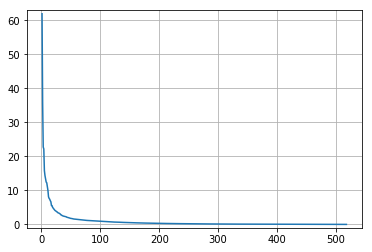

In [3]:
print 'N = ', N
print 'd = ', d

E_XX_T = np.dot(original, original.T)/N
U_star, Sig_star, VT_star = np.linalg.svd(E_XX_T)

x = np.arange(1, len(Sig_star)+1)
plt.plot(x, Sig_star)
plt.grid(which='both')
plt.ylim(-1, np.max(Sig_star)+1)
plt.show()

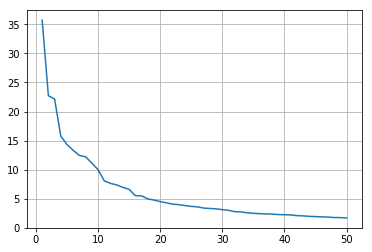

In [4]:
want = 50
x = np.arange(1, want+1)
plt.plot(x, Sig_star[1:want+1])
plt.grid(which='both')
plt.show()

In [5]:
def weighted_cov_sum(original, n, m, N, d, rng, k, n_vects):
    UU_T = np.zeros((d,d))
    UU_T_weighted = np.zeros((d, d))
    UU_T_weighted_ = np.zeros((d, d))
    for i in range(m):
        inds = rng.choice(np.arange(N), n, replace=True)
        A_i = original[:, inds]
        X_i = np.dot(A_i, A_i.T)/n
        U_i, Sig_i, VT_i = np.linalg.svd(X_i)
        UU_T += np.dot(U_i[:, :k], U_i[:, :k].T)
        UU_T_weighted += np.dot(U_i[:, :k], np.dot(np.diag(Sig_i[:k]), U_i[:, :k].T))        
        UU_T_weighted_ += np.dot(U_i[:, :n_vects], np.dot(np.diag(Sig_i[:n_vects]), U_i[:, :n_vects].T))
    return UU_T/float(m),UU_T_weighted/float(m), UU_T_weighted_/float(m)

In [6]:
n_iter = 200
#n_list = np.arange(1, 1000, 50)
n_list = np.ceil(np.logspace(2.5, 4.5, 15)).astype(int)
# n_list = [50]
k = 10
c = 7
n_vects = int(np.minimum(N, c*k))
print '# of vectors: ', n_vects
print 'n_list: ', n_list
print

top_subspace = np.dot(U_star[:, 1:k+1], U_star[:, 1:k+1].T)

m = 50
errs = []
errs_weighted = []
errs_weighted_ = []

stds = []
stds_weighted = []
stds_weighted_ = []

for n in n_list:
    err = []
    err_weighted = []
    err_weighted_ = []
    for i in range(n_iter):
        UU_T, UU_T_weigthed, UU_T_weighted_ = weighted_cov_sum(original, n, m, N, d, rng, k, n_vects)
        U, _, _ = np.linalg.svd(UU_T)
        #print 'past SVD step'
        U_weighted, _, _ = np.linalg.svd(UU_T_weigthed)
        U_weighted_, _, _ = np.linalg.svd(UU_T_weighted_)
        err += [np.linalg.norm(top_subspace - np.dot(U[:, 1:k+1], U[:, 1:k+1].T), ord='fro')]
        err_weighted += [np.linalg.norm(top_subspace - np.dot(U_weighted[:, 1:k+1], U_weighted[:, 1:k+1].T), ord='fro')]
        err_weighted_ += [np.linalg.norm(top_subspace - np.dot(U_weighted_[:, 1:k+1], U_weighted_[:, 1:k+1].T), ord='fro')]
    errs += [np.mean(err)]
    errs_weighted += [np.mean(err_weighted)]
    errs_weighted_ += [np.mean(err_weighted_)]
    stds += [np.std(err)]
    stds_weighted += [np.std(err_weighted)]
    stds_weighted_ += [np.std(err_weighted_)]
    print 'n = ', n, ' done.'
    print 'err = ', np.mean(err), ' std = ', np.std(err)
    print 'err_weighted = ', np.mean(err_weighted), ' std_weighted = ', np.std(err_weighted)
    print 'err_weighted_ = ', np.mean(err_weighted_), ' std_weighted_ = ', np.std(err_weighted_)
    print

plt.plot(n_list, errs, c='r')
plt.plot(n_list, errs_weighted, c='g')
plt.plot(n_list, errs_weighted_, c='b')


plt.grid(which='both')
plt.show()

# of vectors:  70
n_list:  [  317   440   611   849  1179  1638  2276  3163  4394  6106  8484 11788
 16379 22759 31623]

n =  317  done.
err =  1.7658670709824416  std =  0.04631973833455031
err_weighted =  1.3927759458973017  std_weighted =  0.3133966504768673
err_weighted_ =  1.2587177384110853  std_weighted_ =  0.3689804878932565

n =  440  done.
err =  1.7108115161299755  std =  0.05239011025853927
err_weighted =  1.2699347129736758  std_weighted =  0.31771376868923773
err_weighted_ =  1.1492144833215592  std_weighted_ =  0.3660246001373758

n =  611  done.
err =  1.5866923383924303  std =  0.15975983463545626
err_weighted =  1.1018752994729588  std_weighted =  0.291203517075617
err_weighted_ =  0.9750728526546658  std_weighted_ =  0.34146912427643134

n =  849  done.
err =  1.358025500434578  std =  0.2004497032097147
err_weighted =  0.9602870469921417  std_weighted =  0.2604646668790692
err_weighted_ =  0.8191206171190671  std_weighted_ =  0.3134470249030132

n =  1179  done.
err

LinAlgError: SVD did not converge

In [ ]:
x = len(errs_weighted_)
x_axis = n_list[: x]
plt.errorbar(x_axis, errs, stds, c='r', lw=0.5, marker='*', label='unweighted')
plt.errorbar(x_axis, errs_weighted, stds_weighted, c='g', lw=0.5, marker='x', label='weighted k')
plt.errorbar(x_axis, errs_weighted_, stds_weighted_, c='b', lw=0.5, marker='+', label='weighted ck')
plt.legend()

plt.xlabel('m')
plt.ylabel('frob error of top k vectors')

plt.grid(which='both')
plt.show()

In [ ]:
### add more maybe

n_list:  [  317   409   528   682   880  1137  1468  1896  2449  3163  5012 12590
 31623]

n =  5012  done.
err =  1.0428705174285111  std =  0.2501876538705576
err_weighted =  0.705346343961704  std_weighted =  0.09786076917292998
err_weighted_ =  0.4123148645922096  std_weighted_ =  0.19571359394026114

n =  12590  done.
err =  0.48088724800121857  std =  0.04669142831433968
err_weighted =  0.4725609100050653  std_weighted =  0.06020613133101937
err_weighted_ =  0.25327571192266285  std_weighted_ =  0.11475902402892675

n =  31623  done.
err =  0.4320983773419623  std =  0.051812529932434376
err_weighted =  0.41920964361732743  std_weighted =  0.06169357822077295
err_weighted_ =  0.16105626920717345  std_weighted_ =  0.0808217889578667



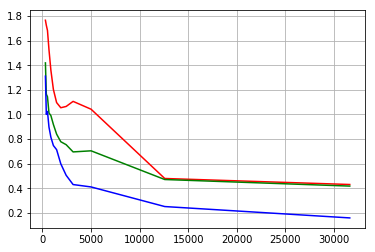

In [10]:
n_list_more = np.ceil(np.logspace(3.7, 4.5, 3)).astype(int)
n_list_new = np.concatenate((n_list, n_list_more))
print 'n_list: ', n_list_new
print

for n in n_list_more:
    err = []
    err_weighted = []
    err_weighted_ = []
    for i in range(n_iter):
        UU_T, UU_T_weigthed, UU_T_weighted_ = weighted_cov_sum(original, n, m, N, d, rng, k, n_vects)
        U, _, _ = np.linalg.svd(UU_T)
        #print 'past SVD step'
        U_weighted, _, _ = np.linalg.svd(UU_T_weigthed)
        U_weighted_, _, _ = np.linalg.svd(UU_T_weighted_)
        err += [np.linalg.norm(top_subspace - np.dot(U[:, 1:k+1], U[:, 1:k+1].T), ord='fro')]
        err_weighted += [np.linalg.norm(top_subspace - np.dot(U_weighted[:, 1:k+1], U_weighted[:, 1:k+1].T), ord='fro')]
        err_weighted_ += [np.linalg.norm(top_subspace - np.dot(U_weighted_[:, 1:k+1], U_weighted_[:, 1:k+1].T), ord='fro')]
    errs += [np.mean(err)]
    errs_weighted += [np.mean(err_weighted)]
    errs_weighted_ += [np.mean(err_weighted_)]
    stds += [np.std(err)]
    stds_weighted += [np.std(err_weighted)]
    stds_weighted_ += [np.std(err_weighted_)]
    print 'n = ', n, ' done.'
    print 'err = ', np.mean(err), ' std = ', np.std(err)
    print 'err_weighted = ', np.mean(err_weighted), ' std_weighted = ', np.std(err_weighted)
    print 'err_weighted_ = ', np.mean(err_weighted_), ' std_weighted_ = ', np.std(err_weighted_)
    print

plt.plot(n_list_new, errs, c='r')
plt.plot(n_list_new, errs_weighted, c='g')
plt.plot(n_list_new, errs_weighted_, c='b')


plt.grid(which='both')
plt.show()

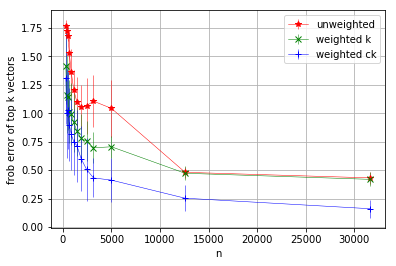

In [14]:
x = len(errs_weighted_)
x_axis = n_list_new[: x]
plt.errorbar(x_axis, errs, stds, c='r', lw=0.5, marker='*', label='unweighted')
plt.errorbar(x_axis, errs_weighted, stds_weighted, c='g', lw=0.5, marker='x', label='weighted k')
plt.errorbar(x_axis, errs_weighted_, stds_weighted_, c='b', lw=0.5, marker='+', label='weighted ck')
plt.legend()

plt.xlabel('n')
plt.ylabel('frob error of top k vectors')

plt.grid(which='both')
plt.show()

In [15]:
# CHANGE FILE NAME if saving!!!!
x = len(errs_weighted_)
x_axis = n_list_new[: x]
plt.errorbar(x_axis, errs, stds, c='r', lw=0.5, marker='*', label='unweighted')
plt.errorbar(x_axis, errs_weighted, stds_weighted, c='g', lw=0.5, marker='x', label='weighted k')
plt.errorbar(x_axis, errs_weighted_, stds_weighted_, c='b', lw=0.5, marker='+', label='weighted ck')
plt.legend()

plt.xlabel('n')
plt.ylabel('frob error of top k vectors')

plt.grid(which='both')
plt.savefig('music_data_N_reduced_k_10_c_3_niter_200_m_50_n_vary_2.pdf')